#### **1. Load the Data**

- Load the sklearn `digits` dataset.
- Normalize the data to a range of [0, 1].
- Display a few examples of the digit images alongside their corresponding labels.


Feature shape: (1797, 64), Target shape: (1797,), Images shape(1797, 8, 8)
Digit 0: 9.91%
Digit 1: 10.13%
Digit 2: 9.85%
Digit 3: 10.18%
Digit 4: 10.07%
Digit 5: 10.13%
Digit 6: 10.07%
Digit 7: 9.96%
Digit 8: 9.68%
Digit 9: 10.02%
pixel array 0: [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


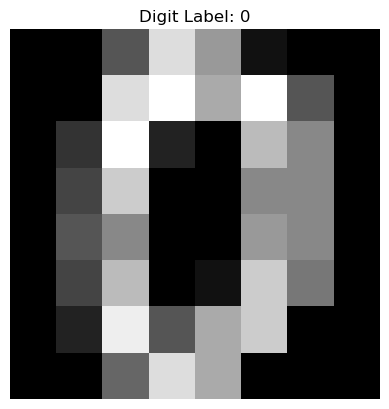

pixel array 1: [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


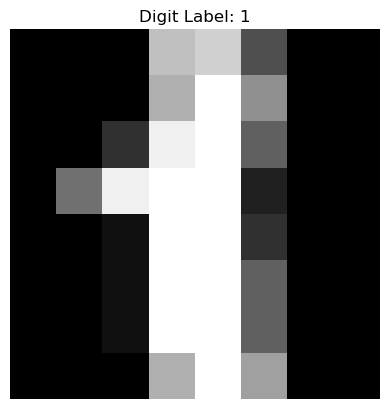

pixel array 2: [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


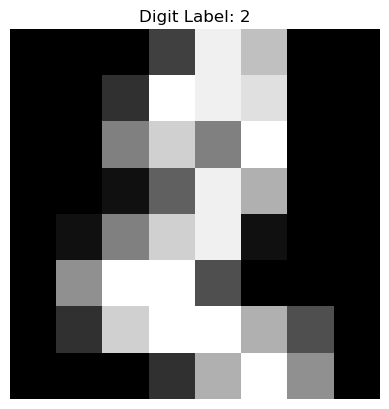

pixel array 3: [[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


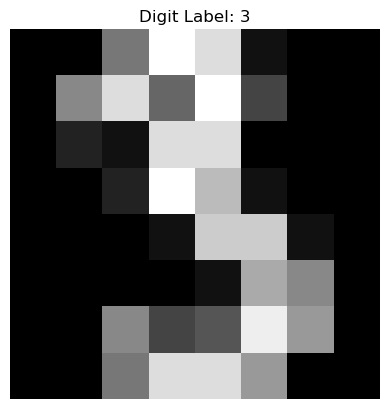

pixel array 4: [[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


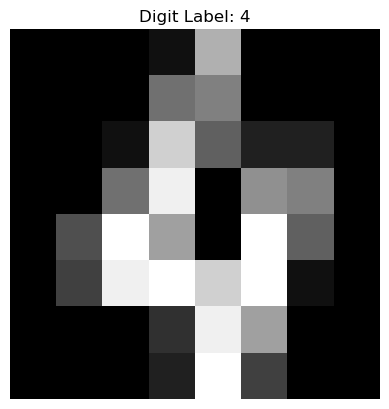

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

digits =load_digits()
X = digits.data
y = digits.target
images = digits.images
print(f"Feature shape: {X.shape}, Target shape: {y.shape}, Images shape{images.shape}")

#Calculating percentages by class for exploration 
from collections import Counter
def digit_percentage(digit_list):
    total_count = len(digit_list)
    digit_counts = Counter(digit_list)    
    percentages = {digit: (count / total_count) * 100 for digit, count in digit_counts.items()}    
    return percentages

#Show percentage by class
percentages = digit_percentage(y)
for digit in range(10):  
    print(f"Digit {digit}: {percentages.get(digit, 0):.2f}%")

#Show examples of digit images with their labels
for i in range(5):
    print(f'pixel array {i}:', images[i])
    plt.imshow(images[i], cmap='gray')  # Use a grayscale colormap
    plt.title(f"Digit Label: {y[i]}")
    plt.axis('off')  
    plt.show()
    
    


#### **2. Split the Data**

- Split the dataset into three subsets: training, validation, and test sets. Use a split ratio of approximately 60%/20%/20%.
- Shuffle the data to ensure randomness in splits.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 1078
Validation set size: 359
Test set size: 360


#### **3. Define the Model**

- Write a function to define a Multi-Layer Perceptron (MLP) model.
  - The function should take user-defined parameters for:
    - Number of hidden layers.
    - Number of neurons per layer.
    - Activation functions (ReLU for hidden layers, softmax for the output layer).
    - Implementation should be general, i.e. should work for any user-defined parameters
    - Save the parameters of the model in a vector for training
  - Initialize weights and biases for each layer.
  - Implement forward propagation (i.e. ANN evaluation).

#### **4. Define the Loss Function**

- Implement a function to compute the categorical cross-entropy (CCE) loss.
- Include an L2 regularization term in the loss to penalize large weights.
- Ensure the function works for both the training and validation sets.

#### **5. Write the Gradient Descent Loop**

- Implement a gradient descent training loop to update the weights and biases:
  - Perform finite-difference to compute gradients for each layer.
  - Update weights and biases using the gradients and a learning rate.
  - Track the loss at each epoch for both training and validation sets.
- Use previous assignment solutions as a reference if needed.

In [ ]:

class MLP:
    def __init__(self, input_size, hidden_layers, output_size, lambda_reg=0.01, learning_rate=0.01, hidden_activations='relu', out_activation='softmax'):
        """
        Parameters:
        - input_size (int): Number of input neurons.
        - hidden_layers (list): List containing number of neurons in each hidden layer.
        - output_size (int): Number of output neurons (e.g., 10 for digit classification).
        - lambda_reg (float): Regularization strength (default is 0.01).
        - learning_rate (float): Learning rate for gradient descent.
        """
        self.layers = [input_size] + hidden_layers + [output_size]
        self.weights = []
        self.biases = []
        self.lambda_reg = lambda_reg
        self.learning_rate = learning_rate

        #Allowed strings for user-specified activation functions
        activation_functions = {
            'relu': self.relu,
            'softmax': self.softmax
        }
        
        #Initialize activation functions from the user input (must be strings 'relu' and 'softmax')
        self.hidden_activations = activation_functions.get(hidden_activations, 
                                    lambda: (_ for _ in ()).throw(ValueError(f"Invalid hidden activation function '{hidden_activations}'. Allowed values: 'relu'.")))
        self.out_activation = activation_functions.get(out_activation, 
                                lambda: (_ for _ in ()).throw(ValueError(f"Invalid output activation function '{out_activation}'. Allowed values: 'softmax'.")))

        # Initialize weights and biases
        for i in range(len(self.layers) - 1):
            weight_matrix = np.random.randn(self.layers[i], self.layers[i+1]) * 0.01
            bias_vector = np.zeros((1, self.layers[i+1]))
            self.weights.append(weight_matrix)
            self.biases.append(bias_vector)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # subtracting the max of each row to prevent overflow
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        """
        input: X, a numpy array of shape (batch_size, input_size).
        Output: Returns a list of activations from each layer.
        """
        #initialize activations as the input matrix X
        activations = [X]
        A = X

        #Propogate through the hidden layers
        for i in range(len(self.weights) - 1):  
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = self.hidden_activations(Z)
            activations.append(A)

        #Generate the output layer Z and softmax activation 
        Z_out = np.dot(A, self.weights[-1]) + self.biases[-1]
        A_out = self.out_activation(Z_out)
        activations.append(A_out)
        #print('softmax outputs:', A_out) #sanity check to make sure the softmax is giving probabilities for the 10 output classes

        return activations
    
    def categorical_crossentropy(self, y_true, y_pred):
        """
        Parameters:
        - y_true (numpy array): True labels as integers (e.g., 0-9).
        - y_pred (numpy array): Predicted probabilities from the network.
        """
        m = y_true.shape[0]  # Number of samples
        epsilon = 1e-15  # Avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0) and log(1)
        log_preds = np.log(y_pred[range(m), y_true]) # Select the log of the predicted probability corresponding to the true class
        loss = -np.sum(log_preds) / m
        return loss

    def l2_regularization(self):
        l2_loss = 0
        for W in self.weights:
            l2_loss += np.sum(W ** 2)
        return 0.5 * self.lambda_reg * l2_loss

    def compute_loss(self, y_true, activations):
            """
            Parameters:
            - y_true (numpy array): True labels (integers).
            - activations (list): List of activations from each layer.
            """
            y_pred = activations[-1]
            cce_loss = self.categorical_crossentropy(y_true, y_pred)
            l2_loss = self.l2_regularization()
            total_loss = cce_loss + l2_loss
            return total_loss

    def finite_difference_gradients(self, X, y_true, epsilon=1e-5):
        """
        Parameters:
        - X (numpy array): Input data of shape (batch_size, input_size).
        - y_true (numpy array): True labels as integers.
        - epsilon (float): Small perturbation for finite difference.
        
        Returns: weight_gradients (list), bias_gradients (list)
        """
        weight_gradients = []
        bias_gradients = []
        
        # Compute the loss at the original parameters.
        original_loss = self.compute_loss(y_true, self.forward(X))
        
        # Loop over each layer for weights and biases.
        for i in range(len(self.weights)):
            # --- Compute weight gradients ---
            grad_w = np.zeros_like(self.weights[i])
            # Iterate over every element in the weight matrix.
            for index in np.ndindex(self.weights[i].shape):
                original_val = self.weights[i][index]
                # Perturb only this element.
                self.weights[i][index] = original_val + epsilon
                loss_plus = self.compute_loss(y_true, self.forward(X))
                # Compute the finite difference approximation for this element.
                grad_w[index] = (loss_plus - original_loss) / epsilon
                # Restore the original value.
                self.weights[i][index] = original_val
            weight_gradients.append(grad_w)
            
            # --- Repeat for th the bias vector ---
            grad_b = np.zeros_like(self.biases[i])
            for index in np.ndindex(self.biases[i].shape):
                original_val = self.biases[i][index]
                self.biases[i][index] = original_val + epsilon
                loss_plus = self.compute_loss(y_true, self.forward(X))
                grad_b[index] = (loss_plus - original_loss) / epsilon
                self.biases[i][index] = original_val
            bias_gradients.append(grad_b)
            
        return weight_gradients, bias_gradients
    
    def early_stopping(self, val_loss, patience=5):
        #initialize best loss and the counter
        if not hasattr(self, 'best_loss'):
            self.best_loss = np.inf
            self.counter = 0
        #check if current loss is the lowest so far
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        #If not lower, increase the count
        else:
            self.counter += 1
        #return True if the counter reaches the patience set point
        return self.counter >= patience
        
    def train(self, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
        train_loss_history = []
        val_loss_history = []

        for epoch in range(epochs):
            # Shuffle training data at the start of each epoch
            indices = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            epoch_train_loss = 0

            # Loop over the training data in batches
            for i in range(0, X_train.shape[0], batch_size):
                batch_X = X_train_shuffled[i:i + batch_size]
                batch_y = y_train_shuffled[i:i + batch_size]

                # Compute gradients using finite differences for both weights and biases
                weight_gradients, bias_gradients = self.finite_difference_gradients(batch_X, batch_y)
                
                #Option to track the gradients
                #if i == 0:
                #    print(f'Gradients for batch 0 in epoch {epoch}:')
                #    print('Weight gradients:', weight_gradients)
                #    print('Bias gradients:', bias_gradients)

                # Update weights and biases using the gradients
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * weight_gradients[j]
                    self.biases[j] -= self.learning_rate * bias_gradients[j]

                # Track the loss for training data
                epoch_train_loss += self.compute_loss(batch_y, self.forward(batch_X))
                
            # Track the loss for validation data
            epoch_val_loss = self.compute_loss(y_val, self.forward(X_val))

            # Average loss for the epoch
            train_loss_history.append(epoch_train_loss / (X_train.shape[0] // batch_size)) #per batch
            val_loss_history.append(epoch_val_loss)

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss_history[-1]:.2f} | Val Loss: {val_loss_history[-1]:.2f}")

            #Early stopping
            if self.early_stopping(epoch_val_loss, patience=5) == True:
                print('Stopping early')
                return train_loss_history, val_loss_history
            
        return train_loss_history, val_loss_history
        
        

    

#### **6. Tune Hyperparameters with L2 Regularization**

- Write a loop to train the model with varying L2 regularization strengths.
- Evaluate the performance of the model on the validation set for each regularization value.
- Identify the optimal regularization strength based on validation loss (include relevant plots).

lambda_values:[1.00000000e-08 5.33669923e-08 2.84803587e-07 1.51991108e-06
 8.11130831e-06 4.32876128e-05 2.31012970e-04 1.23284674e-03
 6.57933225e-03 3.51119173e-02 1.87381742e-01 1.00000000e+00]
step 0, lambda = 1e-08
Epoch 1/100 | Train Loss: 2.37 | Val Loss: 2.30
Epoch 2/100 | Train Loss: 2.37 | Val Loss: 2.30
Epoch 3/100 | Train Loss: 2.32 | Val Loss: 2.10
Epoch 4/100 | Train Loss: 1.66 | Val Loss: 1.64
Epoch 5/100 | Train Loss: 1.18 | Val Loss: 1.29
Epoch 6/100 | Train Loss: 0.99 | Val Loss: 1.21
Epoch 7/100 | Train Loss: 0.66 | Val Loss: 0.82
Epoch 8/100 | Train Loss: 0.42 | Val Loss: 0.74
Epoch 9/100 | Train Loss: 0.32 | Val Loss: 0.31
Epoch 10/100 | Train Loss: 0.27 | Val Loss: 0.51
Epoch 11/100 | Train Loss: 0.19 | Val Loss: 0.52
Epoch 12/100 | Train Loss: 0.15 | Val Loss: 0.42
Epoch 13/100 | Train Loss: 0.11 | Val Loss: 0.19
Epoch 14/100 | Train Loss: 0.23 | Val Loss: 1.31
Epoch 15/100 | Train Loss: 0.16 | Val Loss: 0.16
Epoch 16/100 | Train Loss: 0.13 | Val Loss: 0.15
Epoc

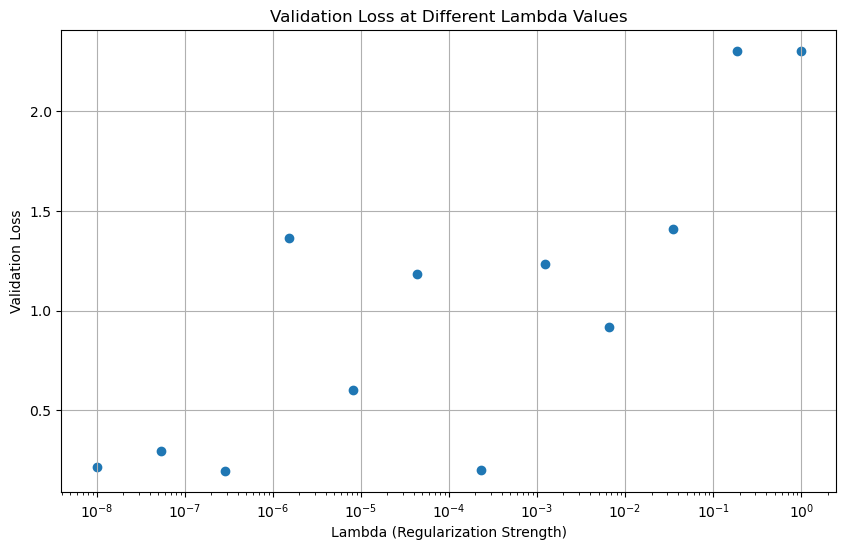

In [8]:
import matplotlib.pyplot as plt

training_iterations = 12
input_size = 64  # Digits dataset has 64 input features (8x8 images flattened)
hidden_layers = [24, 12]  # number of nuerons in each layer
output_size = 10  # 10 classes (digits 0-9)
learning_rate = 0.1  #This higher learning rate was needed to speed up training, but made the variance in the loss curves high. 
lambda_values = np.logspace(-8, 0, num=training_iterations) 
print(f'lambda_values:{lambda_values}')
loss_values = []

count=0
for i in lambda_values:
#Iterate through each lambda value
    print(f"step {count}, lambda = {i}") #To make sure the loop is running if it's taking a long time
    count+=1
    lambda_reg = i
    # Initialize the model
    mlp_model = MLP(input_size, hidden_layers, output_size, lambda_reg, learning_rate)
    # Train the model 
    train_loss, val_loss = mlp_model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)
    loss_values.append(np.mean(val_loss[-5:])) #taking the average of the last five values to reduce variance.

plt.figure(figsize=(10, 6))
plt.scatter(lambda_values, loss_values)
plt.xscale('log') 
plt.yscale('linear')  
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Validation Loss')
plt.title('Validation Loss at Different Lambda Values')
plt.grid(True)
plt.show()

#### **7. Train the Optimal Model**

- Using the best L2 regularization strength, train the model on the combined training and validation sets.
- Evaluate the model's performance on the test set.

In [ ]:
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

lambda_reg = 10e-5 #The strongest regularization in the graph above before validation loss regressed

# Initialize the model
mlp_model = MLP(input_size, hidden_layers, output_size, lambda_reg, learning_rate=.01) #lower learning rate for final model because before I had to limit training time since I was testing at multiple lambda values.

# Train the model 
train_loss, val_loss = mlp_model.train(X_combined, y_combined, X_test, y_test, epochs=100, batch_size=32)
print(f'loss history:{val_loss}') 
print(f'final val loss (last 5 epochs):{np.mean(val_loss[-5:])}')


Epoch 1/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 2/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 3/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 4/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 5/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 6/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 7/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 8/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 9/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 10/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 11/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 12/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 13/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 14/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 15/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 16/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 17/100 | Train Loss: 2.35 | Val Loss: 2.30
Epoch 18/100 | Train Loss: 2.35 | Val Loss: 2.29
Epoch 19/100 | Train Loss: 2.34 | Val Loss: 2.29
Epoch 20/100 | Train Loss: 2.34 | Val Loss: 2.28
Epoch 21/100 | Train Loss: 2.

#### **8. Visualize Results**

- Plot the loss curves for both training and validation sets over epochs.
- Create a confusion matrix and classification report using the SkLearn library  to analyze the model's performance on the test set.

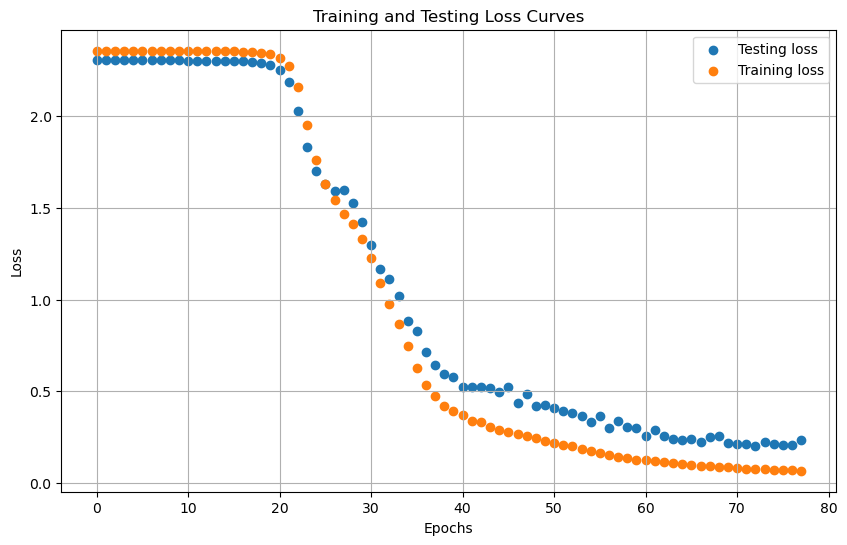

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.93      0.76      0.84        37
           2       0.85      1.00      0.92        35
           3       0.88      0.95      0.91        37
           4       0.97      0.97      0.97        36
           5       0.95      1.00      0.97        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.79      0.74      0.76        35
           9       0.89      0.89      0.89        36

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



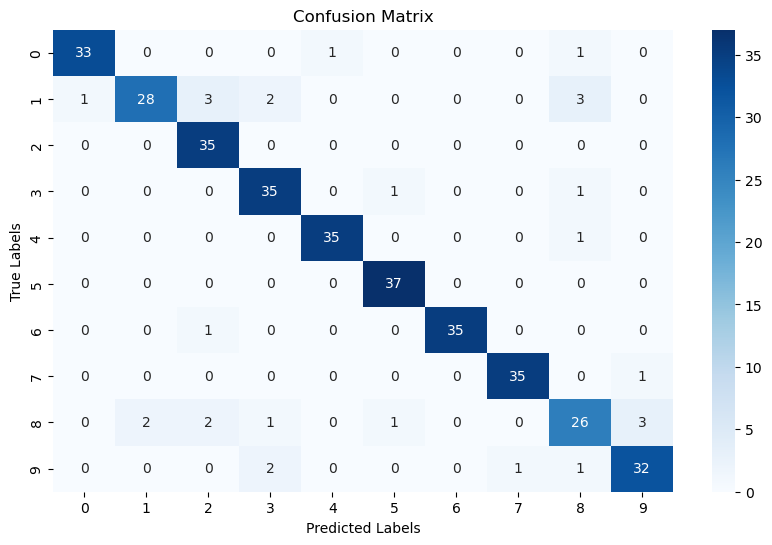

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Loss curves
x_axis = np.arange(len(val_loss))
plt.figure(figsize=(10, 6))
#plt.ylim(y_min,y_max)
plt.scatter(x_axis, val_loss, label='Testing loss')
plt.scatter(x_axis, train_loss, label='Training loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.grid(True)
plt.legend()
plt.show()

#Confusion matrix
y_pred = mlp_model.forward(X_test)[-1].argmax(axis=1)  #Get predicted class indices
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()